Source code for 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import numpy as np

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


MLPClassifier: Multi-Layer Perceptron

In [ ]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
mlp_model=tf.keras.models.Sequential()
mlp_model.add(tf.keras.layers.Flatten()) # takes 28 x 28 images and makes it 1 x 784
mlp_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # simple fully connected layer
mlp_model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
mlp_model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [ ]:
mlp_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', #minimizing loss by calculating error
             metrics=['accuracy'])

In [ ]:
mlp_model.fit(x_train,y_train,epochs=15)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9973
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0068 - accuracy: 0.9977
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0067 - accuracy: 0.9977
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9983
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9983
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0056 - accurac

In [ ]:
val_loss, mlp_model_accuracy = mlp_model.evaluate(x_test,y_test)


313/313 [==============================] - 1s 1ms/step - loss: 0.1585 - accuracy: 0.9758


In [ ]:
mlp_model.save('digit_predictor_model_mlp.model')


INFO:tensorflow:Assets written to: digit_predictor_model_mlp.model/assets


In [ ]:
mlp_model = tf.keras.models.load_model('digit_predictor_model_mlp.model') # multilayer percetrons


In [ ]:
x_test[0,:].shape

(28, 28)

In [ ]:
prediction = mlp_model.predict(np.expand_dims(x_test[1],0))
np.argmax(prediction)

2

In [ ]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    #plt.plot(epochs, train_metrics)
    #plt.plot(epochs, val_metrics)
    plt.figure(figsize=(4,4))
    plt.plot(epochs,train_metrics, '-', label = "Training Accuracy",linewidth=2)
    plt.plot(epochs,val_metrics,'--', label = "Validation Accuracy",linewidth=2)

    #plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs", fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.legend(["trainning "+metric, 'validation '+metric])

    plt.xticks( fontsize = 15)
    plt.yticks (fontsize = 15)

    plt.legend(fontsize = 15)
    plt.savefig('train-val.png', bbox_inches='tight', dpi = 300)
    plt.show()

Convolutional Neural Network

In [ ]:
# Simple CNN for the MNIST Dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# define a simple CNN model

cnn_model = Sequential()
cnn_model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cnn_model.add(MaxPooling2D())
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(num_classes, activation='softmax'))
# Compile model

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
cnn_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history_constant  = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10) #, batch_size=200
# Final evaluation of the model

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/10
 150/1875 [=>............................] - ETA: 34s - loss: 2.0215 - accuracy: 0.3758

KeyboardInterrupt: ignored

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

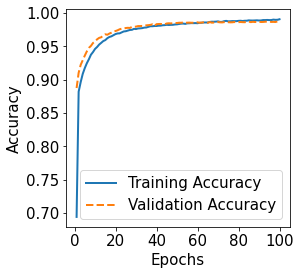

In [ ]:
plot_metric(history_constant, 'accuracy')


In [ ]:
history_constant

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
val_loss, cnn_model_accuracy = cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0328 - accuracy: 0.9887


In [ ]:
cnn_model.save('digit_predictor_model_cnn.model') # convolutional neural network

INFO:tensorflow:Assets written to: digit_predictor_model_cnn.model/assets


In [ ]:
cnn_model = tf.keras.models.load_model('digit_predictor_model_cnn.model') # convolutional neural network

# Machine Learning: RandomForest, DecistionTree, SVM, Naive Bayes

In [ ]:

 # https://github.com/pramodini18/Digit-recognition-using-SVM/blob/master/Handwritten%20digit%20recognition%20using%20SVM.ipynb

import pandas as pd
import numpy as np
from keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix



# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[1])

Randomforest

In [ ]:
randomforest_model = RandomForestClassifier(n_estimators=100)
randomforest_model.fit(X_train, y_train)

y_pred = randomforest_model.predict(X_test)

randomforest_model_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

# accuracy
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Support Vector Machine: kernel = 'poly', C = 1

In [ ]:
# non-linear model
# using poly kernel, C=1, default value of gamma

# model
svc_poly_model = SVC(kernel='poly')

# fit
svc_poly_model.fit(X_train, y_train)

# predict
y_pred = svc_poly_model.predict(X_test)

svc_poly_model_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

# confusion matrix and accuracy, precision, recall

# accuracy
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Decision Tree

In [ ]:
decisiontree_model = DecisionTreeClassifier(max_depth=10) #max_depth=10

decisiontree_model.fit(X_train, y_train)

y_pred = decisiontree_model.predict(X_test)
decisiontree_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

# accuracy
#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Gaussian Naive Bayes

In [ ]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(X_train, y_train)

y_pred = gaussianNB_model.predict(X_test)
gaussianNB_model_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

#print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

#print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Put the accuracy of all the models together



In [ ]:
print("-------- Accuracy of all the models ---------------")
print("MLP Model: " + str(mlp_model_accuracy))
print("CNN Model: "+ str(cnn_model_accuracy))
print("Random Forest Model:" + str(randomforest_model_accuracy))
print("Decision Tree Model:" + str(decisiontree_accuracy))
print("SVM Model:" + str(svc_poly_model_accuracy))
print("Gaussian NB Model:" + str(gaussianNB_model_accuracy))

-------- Accuracy of all the models ---------------
MLP Model: 0.9757999777793884
CNN Model: 0.9886999726295471
Random Forest Model:0.9699
Decision Tree Model:0.8654
SVM Model:0.9771
Gaussian NB Model:0.5558


In [ ]:
import pickle

rf_file_name = "digit_predcitor_model_rf.sav"
svc_file_name = "digit_predictor_model_svc.sav"
dt_file_name = "digit_predictor_model_dt.sav"
nb_file_name = "digit_predictor_model_nb.sav"

pickle.dump(randomforest_model, open(rf_file_name, 'wb'))
pickle.dump(svc_poly_model, open(svc_file_name, 'wb'))
pickle.dump(decisiontree_model, open(dt_file_name, 'wb'))
pickle.dump(gaussianNB_model, open(nb_file_name, 'wb'))



## Done with DL and ML. Its time to add Local Differential Privacy

# **Local Differential Privacy**

In [ ]:
pip install diffPrivLib

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Dropout
#from keras.layers import Flatten
#from keras.layers.convolutional import Conv2D
#from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

from diffprivlib.mechanisms import Laplace
import numpy as np

In [ ]:
def to_binary(img, threshold):
    temp_img = img > threshold

    return temp_img*1

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()


bin_x_train = np.array([to_binary(img, 100) for img in x_train])
bin_x_test = np.array([to_binary(img, 100) for img in x_test])

cp_x_test = bin_x_test.copy()


In [ ]:
def RandomizePoint(width_fixed, org_point, laplace):
    priv_x = int(np.ceil(laplace.randomise(org_point[0])))
    priv_y = int(np.ceil(laplace.randomise(org_point[1])))
            
    if priv_x < 0: 
        priv_x= 0
    elif priv_x >=width_fixed:
         priv_x = width_fixed-1
            
    if priv_y < 0: 
        priv_y = 0
    elif priv_y >=width_fixed:
        priv_y = width_fixed-1
            
    return (priv_x, priv_y) 

In [ ]:
#https://stackoverflow.com/questions/25837544/get-all-points-of-a-straight-line-in-python
def get_line(x1, y1, x2, y2):
    points = []
    issteep = abs(y2-y1) > abs(x2-x1)
    if issteep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2
    rev = False
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
        rev = True
    deltax = x2 - x1
    deltay = abs(y2-y1)
    error = int(deltax / 2)
    y = y1
    ystep = None
    if y1 < y2:
        ystep = 1
    else:
        ystep = -1
    for x in range(x1, x2 + 1):
        if issteep:
            points.append((y, x))
        else:
            points.append((x, y))
        error -= deltay
        if error < 0:
            y += ystep
            error += deltax
    # Reverse the list if the coordinates were reversed
    if rev:
        points.reverse()
    return points

In [ ]:
def generate_noisy_images(bin_x_test, eps):
    diff_image = np.zeros(bin_x_test.shape)

    laplace = Laplace(epsilon = eps, sensitivity=1)

    for k in range(len(bin_x_test)):
        prev_pos = None
        for i in range(28):
            for j in range(28):

                if bin_x_test[k][i][j]==1:
                    rand_pos =  RandomizePoint(28, (i,j), laplace)

                    if prev_pos:
                        points_line = get_line(prev_pos[0], prev_pos[1], rand_pos[0], rand_pos[1])

                        for pos in points_line:
                            diff_image[k][pos[0]][pos[1]] =  1

                        prev_pos = rand_pos
                    else:
                        prev_pos = rand_pos
    return diff_image
                

# **Time to put all the Models to the real test**




In [ ]:
eps = .1
diff_image = generate_noisy_images(bin_x_test, eps)

In [ ]:
bin_x_test.shape

(10000, 28, 28)

In [ ]:
diff_image.shape

(10000, 28, 28)

In [ ]:
X_test[313][0][0]

array([0.], dtype=float32)

In [ ]:
diff_image_cnn = diff_image.reshape((diff_image.shape[0], 28, 28, 1)).astype('float32')

diff_image_cnn.shape

(10000, 28, 28, 1)

In [ ]:
diff_image_cnn = diff_image_cnn / 255

In [ ]:
diff_image_cnn[0][0].shape

(28, 1)

In [ ]:
diff_image_cnn[313][0][0]

array([0.00392157], dtype=float32)

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [ ]:
cnn_y_test = np_utils.to_categorical(y_test)

diff_image_cnn =diff_image.reshape((diff_image.shape[0], 28, 28, 1))
val_loss, eps_cnn_model_accuracy = cnn_model.evaluate(diff_image_cnn, cnn_y_test)

313/313 [==============================] - 2s 7ms/step - loss: 7.2160 - accuracy: 0.0878


In [ ]:
for eps in [1, 2, 3, 4, 5]:

    diff_image = generate_noisy_images(bin_x_test, eps)
    diff_image_cnn = diff_image.reshape((diff_image.shape[0], 28, 28, 1))

    cnn_y_test = np_utils.to_categorical(y_test)
    val_loss, eps_cnn_model_accuracy = cnn_model.evaluate(diff_image_cnn, cnn_y_test)


    print("-------- Accuracy of all the models ---------------")
    print("Epsilon:" + str(eps))
    print("CNN Model: "+ str(eps_cnn_model_accuracy))


313/313 [==============================] - 2s 8ms/step - loss: 2.6921 - accuracy: 0.5137
-------- Accuracy of all the models ---------------
Epsilon:1
CNN Model: 0.513700008392334
313/313 [==============================] - 2s 7ms/step - loss: 1.1476 - accuracy: 0.7355
-------- Accuracy of all the models ---------------
Epsilon:2
CNN Model: 0.7354999780654907
313/313 [==============================] - 2s 7ms/step - loss: 0.9515 - accuracy: 0.7749
-------- Accuracy of all the models ---------------
Epsilon:3
CNN Model: 0.7749000191688538
313/313 [==============================] - 2s 8ms/step - loss: 0.8796 - accuracy: 0.7919
-------- Accuracy of all the models ---------------
Epsilon:4
CNN Model: 0.7918999791145325
313/313 [==============================] - 2s 7ms/step - loss: 0.8630 - accuracy: 0.7936
-------- Accuracy of all the models ---------------
Epsilon:5
CNN Model: 0.7936000227928162


eps = 1

In [ ]:
for eps in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5,6, 7, 8, 9, 10]:

    diff_image = generate_noisy_images(bin_x_test, eps)

    diff_image_mlp = diff_image
    diff_image_cnn = diff_image.reshape((diff_image.shape[0], 28, 28, 1))
    diff_image_ml = diff_image.reshape(diff_image.shape[0], diff_image.shape[1]*diff_image.shape[1])

    val_loss, eps_mlp_model_accuracy = mlp_model.evaluate(diff_image_mlp,y_test)

    cnn_y_test = np_utils.to_categorical(y_test)
    val_loss, eps_cnn_model_accuracy = cnn_model.evaluate(diff_image_cnn, cnn_y_test)

    eps_y_pred = randomforest_model.predict(diff_image_ml)
    eps_randomforest_model_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=eps_y_pred)

    eps_y_pred = svc_poly_model.predict(diff_image_ml)
    eps_svc_poly_model_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=eps_y_pred)

    eps_y_pred = decisiontree_model.predict(diff_image_ml)
    eps_decisiontree_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=eps_y_pred)

    eps_y_pred = gaussianNB_model.predict(diff_image_ml)
    eps_gaussianNB_model_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=eps_y_pred)


    print("-------- Accuracy of all the models ---------------")
    print("Epsilon:" + str(eps))
    print("MLP Model: " + str(eps_mlp_model_accuracy))
    print("CNN Model: "+ str(eps_cnn_model_accuracy))
    print("Random Forest Model:" + str(eps_randomforest_model_accuracy))
    print("Decision Tree Model:" + str(eps_decisiontree_accuracy))
    print("SVM Model:" + str(eps_svc_poly_model_accuracy))
    print("Gaussian NB Model:" + str(eps_gaussianNB_model_accuracy))

MLP vs CNN

In [ ]:
for eps in [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5,6, 7, 8, 9, 10]:

    diff_image = generate_noisy_images(bin_x_test, eps)

    diff_image_mlp = diff_image
    diff_image_cnn = diff_image.reshape((diff_image.shape[0], 28, 28, 1))
    diff_image_ml = diff_image.reshape(diff_image.shape[0], diff_image.shape[1]*diff_image.shape[1])

    val_loss, eps_mlp_model_accuracy = mlp_model.evaluate(diff_image_mlp,y_test)

    cnn_y_test = np_utils.to_categorical(y_test)
    val_loss, eps_cnn_model_accuracy = cnn_model.evaluate(diff_image_cnn, cnn_y_test)



    print("-------- Accuracy of all the models ---------------")
    print("Epsilon:" + str(eps))
    print("MLP Model: " + str(eps_mlp_model_accuracy))
    print("CNN Model: "+ str(eps_cnn_model_accuracy))